<a href="https://colab.research.google.com/github/nandini78487/VANAM_NANDINI/blob/main/IMBD_FINAL_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import re,string
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
import gensim.downloader as api
from nltk.tokenize import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#IMPORTING DATA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv.zip",header=0)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#UNDERSTANDING THE DATA

In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                                

In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

positive    25000
negative    25000
Name: sentiment, dtype: int64


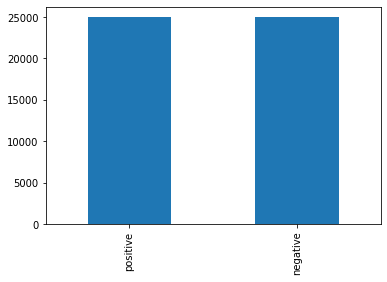

In [ ]:
# Visualising the distribution of the target variable.

print(data.sentiment.value_counts())
data.sentiment.value_counts().plot(kind = 'bar')
plt.show()

#Preprocessing

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
data['review']=data['review'].apply(denoise_text)

##SPECIAL CHARACTERS

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

##LEMMATIZING

In [ ]:
#Lemmatizer example

def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


##STOPWORDS

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'both', 'now', 'mightn', "wasn't", 'most', 'on', 're', "couldn't", 'doing', 'for', 'this', 'between', 'yours', 't', 'down', "you'd", "shan't", "shouldn't", 'o', 'than', 'needn', 'hadn', 'to', "mightn't", 'being', 'at', 'm', 'as', 'his', 'those', "doesn't", 'myself', 'having', 'above', 'until', 'so', 'just', 'themselves', 'where', 'which', "don't", 'your', 'that', 'then', 'each', "you've", "won't", 'ours', 'its', 'shouldn', 'you', 'all', 's', 'under', 'haven', 'can', "aren't", 'these', 'through', 'during', 'had', 'them', 'she', 'her', 'about', 'nor', 'hers', 'theirs', 'not', 'up', 'ma', 'was', 'wouldn', 'same', 'further', 'out', 'who', 'doesn', "you'll", 'do', 'yourself', 'when', "didn't", 'there', 'he', 'very', 'few', 'have', 'of', 'because', 'such', 'any', 'yourselves', 'been', "she's", 'him', 'will', 'couldn', "it's", 'here', 'in', "needn't", 'hasn', "that'll", 'an', 'ain', 'own', 'by', "should've", 'no', 'why', 'be', 'didn', 'shan', 'how', 'into', 'me', 'over', "mustn't", 'our', 's

In [ ]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,Catholic taught parochial elementary schools n...,negative
49998,Im going disagree previous comment side Maltin...,negative


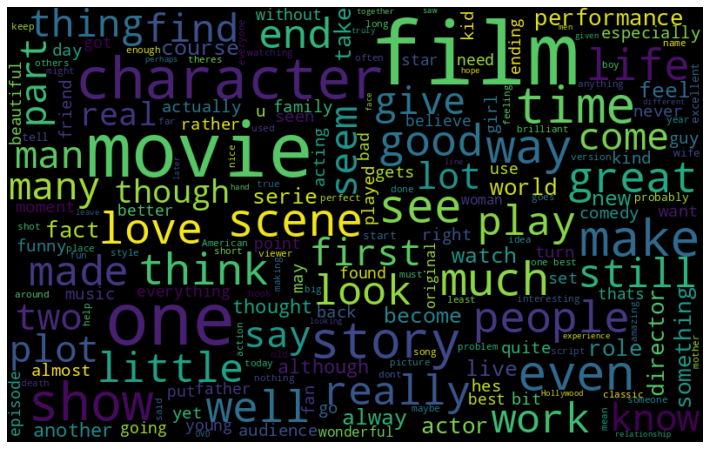

In [ ]:
# frequent words visualization for +ve

all_words = " ".join([sentence for sentence in data['review'][data['sentiment']=='positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

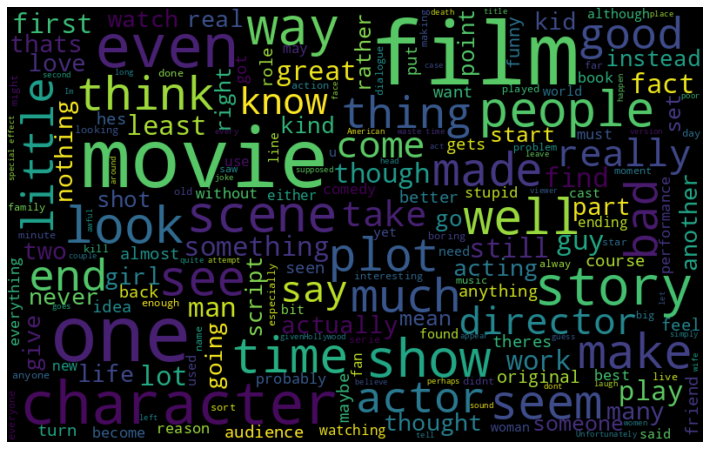

In [ ]:
# frequent words visualization for -ve

all_words = " ".join([sentence for sentence in data['review'][data['sentiment']=='negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
X= data['review']
y=data["sentiment"]
X.head

<bound method NDFrame.head of 0        One reviewers mentioned watching 1 Oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        Basically theres family little boy Jake thinks...
4        Petter Matteis Love Time Money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    Im going disagree previous comment side Maltin...
49999    one expects Star Trek movies high art fans exp...
Name: review, Length: 50000, dtype: object>

In [ ]:
print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=10)
X = vectorizer.fit_transform(data.review)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))



With TFIDFVectorizer
['even' 'film' 'good' 'like' 'movie' 'one' 'really' 'see' 'time' 'would']
[[0.         0.         0.         ... 0.         0.         0.80218334]
 [0.         0.         0.         ... 0.61851381 0.         0.        ]
 [0.52670119 0.         0.         ... 0.53460928 0.52733929 0.        ]
 ...
 [0.         0.         0.68066519 ... 0.         0.         0.73259463]
 [0.         0.         0.         ... 0.         0.26697502 0.27095726]
 [0.33455353 0.         0.15792883 ... 0.33957664 0.         0.16997757]]




In [ ]:
print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words),max_features=10)
X = vectorizer.fit_transform(data.review)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))



With TFIDFVectorizer and removing stop words


/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


['bad' 'dont' 'film' 'good' 'great' 'like' 'movie' 'people' 'story' 'time']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.66167613]
 ...
 [0.37106276 0.35925345 0.         ... 0.72856329 0.33622354 0.        ]
 [0.         0.         0.         ... 0.         0.47450781 0.44748734]
 [0.         0.         0.         ... 0.         0.         0.        ]]




In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Logistic Regression

In [ ]:
# Create a logistic regression object
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.56


##KNN

In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 60.33


##SVM

In [ ]:
# Create a SVM
from sklearn import svm
cls1=svm.SVC(kernel='rbf')
cls1.fit(X_train, y_train)
y_pred = cls1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.41


##Bagging Classifier

In [ ]:
# Create a Bagging classifier
from sklearn.ensemble import BaggingClassifier
clf1 = BaggingClassifier()
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 61.41


##Decision Tree

In [ ]:
# Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier()
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 59.62


##Random Forest

In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 62.4


##Ada Boost

In [ ]:
# Create a Ada Boost
from sklearn.ensemble import AdaBoostClassifier
adaboost1 = AdaBoostClassifier()
adaboost1.fit(X_train, y_train)
y_pred = adaboost1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.22


##Gradient Boost

In [ ]:
# Create a Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
grad_boost1 = GradientBoostingClassifier()
grad_boost1.fit(X_train, y_train)
y_pred = grad_boost1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.72


##XG Boost

In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost1 = XGBClassifier()
xgb_boost1.fit(X_train, y_train)
y_pred = xgb_boost1.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 64.53


#Word2vec

In [ ]:
# Train and download Word2Vec vectors
sentences = [review.split() for review in data['review']]
model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save('word2vec.model')

In [ ]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((100,))
    return np.mean(word_vectors, axis=0)

In [ ]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_train = np.array([sentence_vector(sentence, model) for sentence in data['review']])
word2vec_test = np.array(data['sentiment'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(word2vec_train,word2vec_test,test_size=0.2,random_state=42)

##Logistic Regression

In [ ]:
# Create a logistic regression object
lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 86.1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##KNN

In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 79.4


##SVM

In [ ]:
# Create a SVM
from sklearn import svm
cls2=svm.SVC(kernel='rbf')
cls2.fit(X_train, y_train)
y_pred = cls2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 86.37


##Bagging Classifier

In [ ]:
# Create a Bagging classifier
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier()
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 79.92


##Decision Tree

In [ ]:
# Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree2 = DecisionTreeClassifier()
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 72.09


##Random Forest

In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 83.16


##Ada Boost

In [ ]:
# Create a Ada Boost
from sklearn.ensemble import AdaBoostClassifier
adaboost2 = AdaBoostClassifier()
adaboost2.fit(X_train, y_train)
y_pred = adaboost2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 81.42


##Gradient Boost

In [ ]:
# Create a Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
grad_boost2 = GradientBoostingClassifier()
grad_boost2.fit(X_train, y_train)
y_pred = grad_boost2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 83.67


##XG Boost

In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost2 = xgb.XGBClassifier()
xgb_boost2.fit(X_train, y_train)
y_pred = xgb_boost2.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 83.57


#Combining tfidf and word2vec

In [ ]:
def combine_vectors(doc):
    tfidf_vec = vectorizer.transform([doc])
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

In [ ]:
combined_train = np.array([combine_vectors(doc) for doc in data['review']])
combined_test = np.array(data['sentiment'])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_train, combined_test, test_size=0.2, random_state=42)

##Logistic Regression

In [ ]:
# Create a logistic regression object
lr3 = LogisticRegression()
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 86.14


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##KNN

In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 78.7


##SVM

In [ ]:
# Create a SVM
from sklearn import svm
cls3=svm.SVC(kernel='rbf')
cls3.fit(X_train, y_train)
y_pred = cls3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 86.33999999999999


##Bagging Classifier

In [ ]:
# Create a Bagging classifier
from sklearn.ensemble import BaggingClassifier
clf3 = BaggingClassifier()
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 79.25999999999999


##Decision Tree

In [ ]:
# Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier()
tree3.fit(X_train, y_train)
y_pred = tree3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 72.56


##Random Forest

In [ ]:
# Create a Random Forest
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier()
rf3.fit(X_train, y_train)
y_pred = rf3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 83.16


##Ada Boost

In [ ]:
# Create a Ada Boost
from sklearn.ensemble import AdaBoostClassifier
adaboost3 = AdaBoostClassifier()
adaboost3.fit(X_train, y_train)
y_pred = adaboost3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 81.67


##Gradient Boost

In [ ]:
# Create a Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
grad_boost3 = GradientBoostingClassifier()
grad_boost3.fit(X_train, y_train)
y_pred = grad_boost3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 84.17999999999999


##XG Boost

In [ ]:
# Create a XG Boost
import xgboost as xgb
from xgboost import XGBClassifier
xgb_boost3 = xgb.XGBClassifier()
xgb_boost3.fit(X_train, y_train)
y_pred = xgb_boost3.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', acc*100)

Test accuracy: 83.89999999999999
